## 1. Importing useful libraries and data

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
names = ['imdbID', 'title', 'year', 'score', 'votes', 'runtime', 'genres']
data = pd.read_csv('https://raw.githubusercontent.com/cs109/content/master/imdb_top_10000.txt', delimiter='\t', names=names).dropna()

data.head()

,imdbID,title,year,score,votes,runtime,genres
0,tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142 mins.,Crime|Drama
1,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154 mins.,Crime|Thriller
2,tt0137523,Fight Club (1999),1999,8.8,458173,139 mins.,Drama|Mystery|Thriller
3,tt0133093,The Matrix (1999),1999,8.7,448114,136 mins.,Action|Adventure|Sci-Fi
4,tt1375666,Inception (2010),2010,8.9,385149,148 mins.,Action|Adventure|Sci-Fi|Thriller


## 2. Clean the DataFrame

In [4]:
clean_runtime = [float(r.split(' ')[0]) for r in data.runtime]
data['runtime'] = clean_runtime
data.head()

,imdbID,title,year,score,votes,runtime,genres
0,tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142.0,Crime|Drama
1,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154.0,Crime|Thriller
2,tt0137523,Fight Club (1999),1999,8.8,458173,139.0,Drama|Mystery|Thriller
3,tt0133093,The Matrix (1999),1999,8.7,448114,136.0,Action|Adventure|Sci-Fi
4,tt1375666,Inception (2010),2010,8.9,385149,148.0,Action|Adventure|Sci-Fi|Thriller


In [5]:
# Making the decade column
data['decade'] =  (data.year // 10) * 10
data.head()

,imdbID,title,year,score,votes,runtime,genres,decade
0,tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142.0,Crime|Drama,1990
1,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154.0,Crime|Thriller,1990
2,tt0137523,Fight Club (1999),1999,8.8,458173,139.0,Drama|Mystery|Thriller,1990
3,tt0133093,The Matrix (1999),1999,8.7,448114,136.0,Action|Adventure|Sci-Fi,1990
4,tt1375666,Inception (2010),2010,8.9,385149,148.0,Action|Adventure|Sci-Fi|Thriller,2010


In [6]:
data_select = data[['decade','genres','score']]
data_select.head()

,decade,genres,score
0,1990,Crime|Drama,9.2
1,1990,Crime|Thriller,9.0
2,1990,Drama|Mystery|Thriller,8.8
3,1990,Action|Adventure|Sci-Fi,8.7
4,2010,Action|Adventure|Sci-Fi|Thriller,8.9


In [7]:
genres = set()
for m in data_select.genres:
    genres.update(g for g in m.split('|'))
genres = sorted(genres)

#make a column for each genre
for genre in genres:
    data_select[genre] = [genre in movie.split('|') for movie in data.genres]
data_select.head()

/Users/mehrdadkhojasteh/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,decade,genres,score,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,...,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1990,Crime|Drama,9.2,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,1990,Crime|Thriller,9.0,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,1990,Drama|Mystery|Thriller,8.8,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,1990,Action|Adventure|Sci-Fi,8.7,True,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,2010,Action|Adventure|Sci-Fi|Thriller,8.9,True,False,True,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False


## 3. Group by decade

In [8]:
# dl=data_select.groupby(['decade'])[genres]
# dl.head()
# data_select['ac']=0
# for index, row in data_select.iterrows():
#     if row['Action'] == True:
#         row['ac']=row['score']
label =['Action', 'Adult', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family',
       'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western']
for movies in label: 
    
    data_select[movies] = np.where(data_select[movies],
                             data_select.score,
                             nan)

data_select.head()

,decade,genres,score,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,...,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1990,Crime|Drama,9.2,NaN,NaN,NaN,NaN,NaN,NaN,9.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990,Crime|Thriller,9.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN
2,1990,Drama|Mystery|Thriller,8.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8.8,NaN,NaN,NaN,NaN,NaN,8.8,NaN,NaN
3,1990,Action|Adventure|Sci-Fi,8.7,8.7,NaN,8.7,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.7,NaN,NaN,NaN,NaN
4,2010,Action|Adventure|Sci-Fi|Thriller,8.9,8.9,NaN,8.9,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.9,NaN,8.9,NaN,NaN


In [9]:
dl = data_select.groupby(['decade'])[genres].median().fillna(0)
dl.head()

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,...,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
decade,,,,,,,,,,,,,,,,,,,,,
1950,7.2,0.0,7.2,7.35,7.20,7.2,7.7,7.5,7.1,6.95,...,7.10,7.7,0.0,0.0,7.20,6.55,7.4,7.6,7.50,7.20
1960,7.0,0.0,7.0,7.15,7.85,7.0,7.4,7.6,7.0,6.65,...,6.90,7.3,0.0,0.0,7.20,6.55,7.4,7.2,7.25,7.10
1970,6.7,5.2,6.9,7.40,7.60,7.0,7.0,7.2,7.1,6.85,...,6.95,7.0,0.0,0.0,7.05,6.25,6.9,6.9,7.25,6.90
1980,6.1,0.0,6.5,7.10,7.15,6.1,6.4,6.9,6.6,6.30,...,6.30,6.3,0.0,0.0,6.30,6.10,6.2,6.2,7.10,6.50
1990,5.9,5.3,6.1,6.80,7.00,6.1,6.4,6.7,5.4,6.20,...,6.80,6.5,0.0,5.0,6.40,5.70,5.8,6.2,7.15,6.35


## Normalizing Data
For comparing each genres with other genres, we have to normilize the data set. Because in our data set some columns are 0 and 1, the heat map plot can not demonstrate the diffrence between genres. For this purpose, we have to drop some columns 

In [10]:
dl.drop(['News','Reality-TV','Film-Noir','Adult'], axis=1, inplace=True)

In [11]:
normed = dl /dl.sum(axis=0)
normed.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
decade,,,,,,,,,,,,,,,,,,,,
1950,0.158242,0.154506,0.147887,0.141872,0.156522,0.160752,0.151515,0.157080,0.152580,0.144814,0.155477,0.153684,0.148380,0.161257,0.153355,0.149714,0.157614,0.163090,0.151362,0.153029
1960,0.153846,0.150215,0.143863,0.154680,0.152174,0.154489,0.153535,0.154867,0.145993,0.148728,0.157833,0.151579,0.144201,0.152880,0.153355,0.149714,0.157614,0.154506,0.146317,0.150903
1970,0.147253,0.148069,0.148893,0.149754,0.152174,0.146138,0.145455,0.157080,0.150384,0.143836,0.147232,0.147368,0.145246,0.146597,0.150160,0.142857,0.146965,0.148069,0.146317,0.146652
1980,0.134066,0.139485,0.142857,0.140887,0.132609,0.133612,0.139394,0.146018,0.138310,0.144814,0.134276,0.134737,0.131661,0.131937,0.134185,0.139429,0.132055,0.133047,0.143290,0.138151
1990,0.129670,0.130901,0.136821,0.137931,0.132609,0.133612,0.135354,0.119469,0.136114,0.138943,0.134276,0.143158,0.142111,0.136126,0.136315,0.130286,0.123536,0.133047,0.144299,0.134963


## 4. Plotting

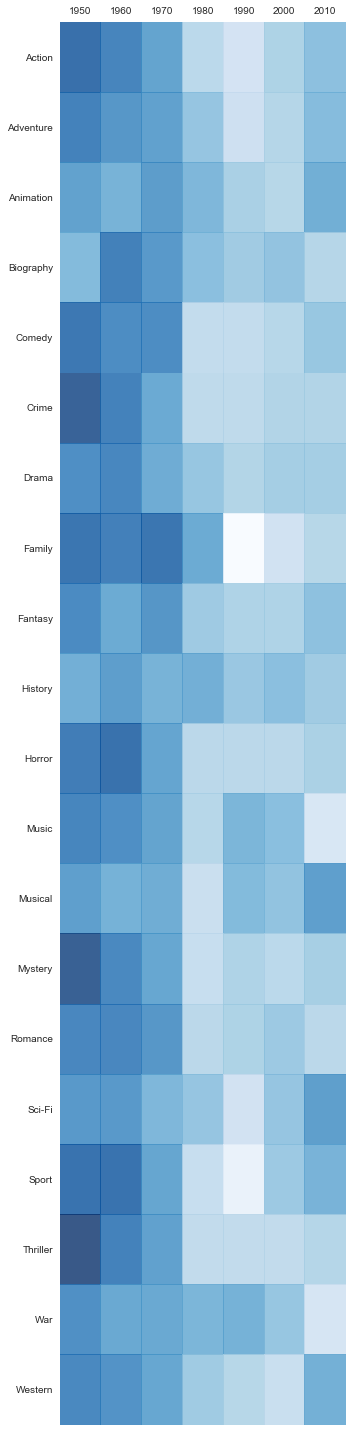

In [12]:
import matplotlib.colors as mcolors
fig, ax = plt.subplots()
heatmap = ax.pcolor(normed.transpose(), cmap=plt.cm.Blues, alpha=0.8)

fig = plt.gcf()
fig.set_size_inches(5, 20)    
ax.set_frame_on(False)
ax.xaxis.tick_top()
ax.set_xticks(np.arange(normed.shape[0]) + 0.5, minor=False)
ax.set_yticks(np.arange(normed.shape[1]) + 0.5, minor=False)

ax.set_xticklabels(normed.index, minor=False)
ax.set_yticklabels(normed, minor=False)
ax.grid(False)
ax = plt.gca()

for t in ax.xaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
for t in ax.yaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
ax.invert_yaxis()
fig.tight_layout()
plt.savefig('./plots/heatmap.png')